In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [9]:
len(X_train)

60000

In [10]:
len(X_test)

10000

In [11]:
X_train[0].shape

(28, 28)

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

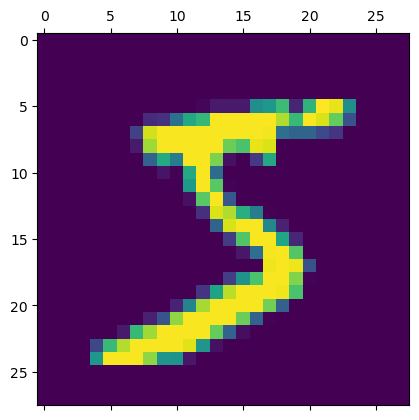

In [13]:
plt.matshow(X_train[0])

In [14]:
y_train[2]

4

In [15]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
X_train = X_train / 255
X_test = X_test / 255

In [24]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [21]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4665 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3029 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2825 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2661 - accuracy: 0.9258


In [25]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2678 - accuracy: 0.9253


[0.26782166957855225, 0.9253000020980835]

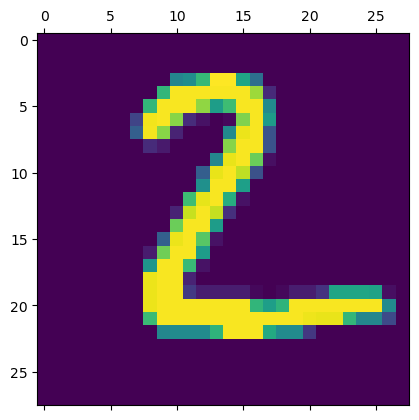

In [31]:
plt.matshow(X_test[1])

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([6.0670882e-01, 4.8844088e-03, 9.9906665e-01, 2.8113854e-01,
       4.3770554e-10, 7.8787440e-01, 8.2585788e-01, 9.6866731e-13,
       1.3231796e-01, 2.5798523e-09], dtype=float32)

In [38]:
np.argmax(y_predicted[1])

2

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [42]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    0,    4,    4,    4,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   9,   11,  923,   17,    7,    3,   13,   11,   34,    4],
       [   5,    0,   19,  924,    0,   18,    2,   12,   21,    9],
       [   1,    2,    2,    2,  912,    0,   12,    4,    9,   38],
       [  12,    3,    2,   38,   10,  762,   19,    8,   30,    8],
       [  14,    3,    5,    1,    7,    9,  915,    2,    2,    0],
       [   2,    7,   20,    7,    6,    0,    0,  953,    2,   31],
       [  11,   12,    5,   19,    9,   24,   10,   13,  864,    7],
       [  11,    7,    1,    9,   26,    6,    0,   27,    5,  917]])>

Text(95.72222222222221, 0.5, 'Truth')

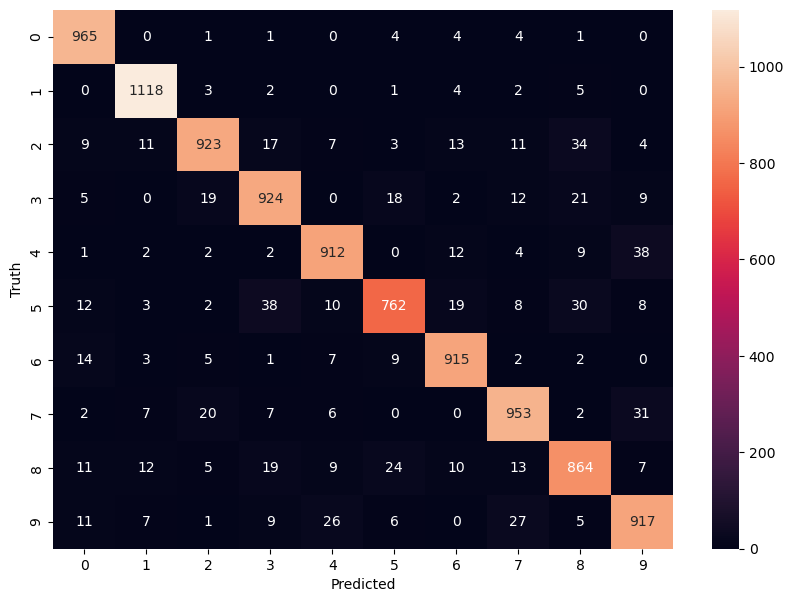

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2740 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1234 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0859 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0654 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0526 - accuracy: 0.9838


In [46]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9789


[0.07011449337005615, 0.9789000153541565]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

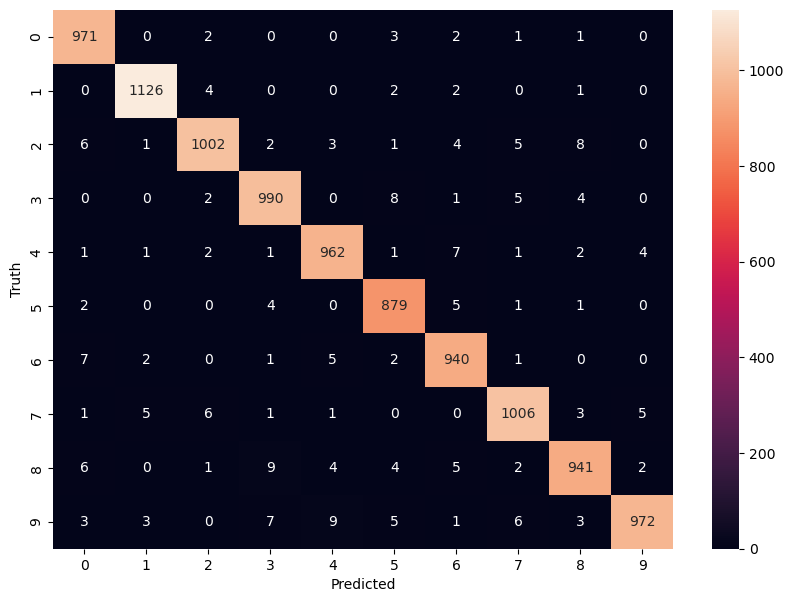

In [48]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2676 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1216 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0866 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0664 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0521 - accuracy: 0.9841
